In [1]:
# Load the autoreload extension
%load_ext autoreload
# Enable autoreload for all modules (mode 2 is most comprehensive)
%autoreload 2

In [ ]:
import ast
from temperament_functions import *
import time
import json
import os
import importlib
import numpy as np

In [4]:
INTERVAL_TYPES_ALL = {
    0: {"name": "P1", "targets": [0.0]},
    3: {"name": "m3", "targets": [315.64, 297.51, 294.13]},
    4: {"name": "M3", "targets": [386.31, 407.82]},
    5: {"name": "P4", "targets": [498.04]},
    7: {"name": "P5", "targets": [701.96]},
    8: {"name": "m6", "targets": [813.69, 792.18, 782.49]},
    9: {"name": "M6", "targets": [884.36, 905.87]},
    12: {"name": "P8", "targets": [1200.0]},

    1: {"name": "m2", "targets": [111.73, 104.96, 133.24, 92.18, 90.22, 70.67]},
    2: {"name": "M2", "targets": [203.91, 182.4]},
    6: {"name": "A4/d5", "targets": [590.22, 582.51, 617.49, 636.62, 563.38, 568.72, 631.28, 609.78]},
    10: {"name": "m7", "targets": [996.09, 1017.6]},
    11: {"name": "M7", "targets": [1088.27, 1066.76, 1109.78]},
}

RATIOS_REFERENCE_ALL = {
    0: ["1/1"],
    1: ["16/15", "17/16", "27/25", "135/128", "256/243", "25/24"],
    2: ["9/8", "10/9"],
    3: ["6/5", "19/16", "32/27"],
    4: ["5/4", "81/64"],
    5: ["4/3"],
    6: ["45/32", "7/5", "10/7", "13/9", "18/13", "25/18", "36/25", "64/45"],
    7: ["3/2"],
    8: ["8/5", "128/81", "11/7"],
    9: ["5/3", "27/16"],
    10: ["16/9", "9/5"],
    11: ["15/8", "50/27", "243/128"],
    12: ["2/1"]
}

INTERVAL_TYPES_FIVE_LIMIT = {
    0: {"name": "P1", "targets": [0.0]},
    3: {"name": "m3", "targets": [315.64]},
    4: {"name": "M3", "targets": [386.31]},
    5: {"name": "P4", "targets": [498.04]},
    7: {"name": "P5", "targets": [701.96]},
    8: {"name": "m6", "targets": [813.69]},
    9: {"name": "M6", "targets": [884.36]},

    1: {"name": "m2", "targets": [111.73]},
    2: {"name": "M2", "targets": [203.91]},
    6: {"name": "A4/d5", "targets": [590.22]},
    10: {"name": "m7", "targets": [996.09]},
    11: {"name": "M7", "targets": [1088.27]},
}

RATIOS_REFERENCE_FIVE_LIMIT = {
    0: ["1/1"],
    1: ["16/15"],
    2: ["9/8"],
    3: ["6/5"],
    4: ["5/4"],
    5: ["4/3"],
    6: ["45/32"],
    7: ["3/2"],
    8: ["8/5"],
    9: ["5/3"],
    10: ["16/9"],
    11: ["15/8"],
    12: ["2/1"]
}

In [ ]:
recompute = False

if recompute:
    # Main experiment
    SCORE_DIR = 'scores_xml/' # not included because of copyright restrictions
    wtc_files = sorted([os.path.join(SCORE_DIR, f) for f in os.listdir(SCORE_DIR) if f.endswith('.xml')])
    wtc_frequencies = process_scores(wtc_files)
    json_wtc_frequencies = {str(key): value for key, value in wtc_frequencies.items()}
    with open('wtc_frequencies.json', 'w') as f:
        json.dump(json_wtc_frequencies, f, indent=2)
else:
    # or read back from file
    with open('wtc_frequencies.json', 'r') as f:
        json_wtc_frequencies = json.load(f)
        wtc_frequencies = {tuple(ast.literal_eval(key)): value for key, value in json_wtc_frequencies.items()}

In [6]:
wtc_interval_data_all_ratios = compute_interval_data(wtc_frequencies, INTERVAL_TYPES_ALL, total_weight=1.0)
wtc_interval_data_five_limit = compute_interval_data(wtc_frequencies, INTERVAL_TYPES_FIVE_LIMIT, total_weight=1.0)

In [7]:
pprint_interval_data(wtc_interval_data_all_ratios)

Sorted by interval
--- P1 ---
C# - C# : 0.0111
Ab - Ab : 0.0110
Eb - Eb : 0.0107
Bb - Bb : 0.0105
B  - B  : 0.0099
F# - F# : 0.0094
C  - C  : 0.0089
F  - F  : 0.0084
E  - E  : 0.0083
A  - A  : 0.0071
D  - D  : 0.0066
G  - G  : 0.0058
--- m2 ---
F  - F# : 0.0083
Bb - B  : 0.0078
Eb - E  : 0.0076
C  - C# : 0.0072
Ab - A  : 0.0065
G  - Ab : 0.0061
D  - Eb : 0.0058
A  - Bb : 0.0053
C# - D  : 0.0051
F# - G  : 0.0047
B  - C  : 0.0046
E  - F  : 0.0046
--- M2 ---
F# - Ab : 0.0121
C# - Eb : 0.0117
Ab - Bb : 0.0110
Eb - F  : 0.0107
B  - C# : 0.0098
E  - F# : 0.0095
Bb - C  : 0.0091
A  - B  : 0.0079
G  - A  : 0.0078
F  - G  : 0.0077
C  - D  : 0.0070
D  - E  : 0.0067
--- m3 ---
Eb - F# : 0.0144
Ab - B  : 0.0138
Bb - C# : 0.0130
C# - E  : 0.0130
F  - Ab : 0.0129
C  - Eb : 0.0114
F# - A  : 0.0114
G  - Bb : 0.0111
D  - F  : 0.0104
A  - C  : 0.0091
E  - G  : 0.0088
B  - D  : 0.0087
--- M3 ---
B  - Eb : 0.0105
C# - F  : 0.0099
F# - Bb : 0.0098
Ab - C  : 0.0098
E  - Ab : 0.0097
Bb - D  : 0.0089
A  - C# 

In [20]:
results = {}
compute_temperaments_ismir2025(
    {
        'wtc_interval_data_all_ratios': wtc_interval_data_all_ratios,
    },
    {
        "Unbounded Fifths": None,
        "Fifths in (696-705)": (696, 705)
    },
    ['dual_annealing', 'differential_evolution', 'basinhopping'],
    overwriteResults=False,
    no_runs = 6,
    inherit_p = True,
    new_p_every = 2,
    result=results,
    verbose = True,
    store_all_runs=True
)
compute_temperaments_ismir2025(
    {
        'wtc_interval_data_five_limit': wtc_interval_data_five_limit
    },
    {
        "Unbounded Fifths": None,
    },
    ['dual_annealing', 'differential_evolution', 'basinhopping'],
    overwriteResults=False,
    no_runs = 6,
    inherit_p = True,
    new_p_every = 2,
    result=results,
    verbose = True,
    store_all_runs=True
)

Configuration:  wtc_interval_data_all_ratios_Unbounded Fifths_dual_annealing
  da_i_t=10.0
  Run 0
    p0=[ 100, 200, 300, 400, 500, 600, 700, 800, 900,1000,1100]
    tuning=[   0.  ,  92.18, 184.36, 296.09, 386.32, 500.  , 590.23, 701.96, 794.14, 884.36, 998.05,1088.27,1200.  ]
    obj_val=0.07823597323885423
    runtime=589.6274319999993 seconds.
    Selected.
  Run 1
    p0=[   0.  ,  92.18, 184.36, 296.09, 386.32, 500.  , 590.23, 701.96, 794.14, 884.36, 998.05,1088.27,1200.  ]
    tuning=[   0.  ,  92.18, 184.36, 296.09, 386.32, 500.  , 590.23, 701.96, 794.14, 884.36, 998.05,1088.27,1200.  ]
    obj_val=0.07823597323885423
    runtime=858.7975840000017 seconds.
  Run 2
    Resetting p0
    p0=[ 100, 200, 300, 400, 500, 600, 700, 800, 900,1000,1100]
    tuning=[   0.  ,  90.22, 182.4 , 294.13, 384.36, 498.04, 588.27, 700.  , 792.18, 884.36, 996.09,1086.31,1200.  ]
    obj_val=-0.012362354226572947
    runtime=545.191566999998 seconds.
    Selected.
  Run 3
    p0=[   0.  ,  90.22, 1

/Users/Krane108/.pyenv/versions/3.12.2/envs/ismir2025/lib/python3.12/site-packages/scipy/optimize/_differentiable_functions.py:552: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)


    tuning=[   0.  ,  90.22, 182.4 , 294.13, 384.36, 498.04, 588.27, 700.  , 792.18, 884.36, 996.09,1086.31,1200.  ]
    obj_val=-0.012362867829686763
    runtime=266.3312389999992 seconds.
    Selected.
  Run 1
    p0=[   0.  ,  90.22, 182.4 , 294.13, 384.36, 498.04, 588.27, 700.  , 792.18, 884.36, 996.09,1086.31,1200.  ]
    tuning=[   0.  ,  90.22, 182.4 , 294.13, 384.36, 498.04, 588.27, 700.  , 792.18, 884.36, 996.09,1086.31,1200.  ]
    obj_val=-0.012362867850844061
    runtime=217.35331999999835 seconds.
    Selected.
  Run 2
    Resetting p0
    p0=[ 100, 200, 300, 400, 500, 600, 700, 800, 900,1000,1100]
    tuning=[   0.  ,  90.23, 201.96, 294.14, 386.32, 498.05, 588.27, 701.96, 792.18, 884.36, 996.09,1086.32,1200.  ]
    obj_val=0.7431876514877263
    runtime=237.39897899999778 seconds.
  Run 3
    p0=[   0.  ,  90.23, 201.96, 294.14, 386.32, 498.05, 588.27, 701.96, 792.18, 884.36, 996.09,1086.32,1200.  ]
    tuning=[   0.  ,  90.23, 201.96, 294.14, 386.32, 498.05, 588.27, 701

{'wtc_interval_data_all_ratios_Unbounded Fifths_dual_annealing': {'best_result': {'parameters': "{'interval_data': [[(0, 4), [386.31, 407.82], 0.007126228570010779], [(0, 7), [701.96], 0.007036108753433121], [(4, 7), [315.64, 297.51, 294.13], 0.008751889022579302], [(0, 0), [0.0], 0.008936854649732345], [(4, 0), [813.69, 792.18, 782.49], 0.004180060208348704], [(4, 4), [0.0], 0.008341705336637244], [(0, 2), [203.91, 182.4], 0.007018264051958879], [(0, 9), [884.36, 905.87], 0.005158503931191805], [(2, 9), [701.96], 0.005730430687573865], [(2, 2), [0.0], 0.006613784151876176], [(0, 5), [498.04], 0.007664054835219458], [(2, 5), [315.64, 297.51, 294.13], 0.010424524225832272], [(11, 2), [315.64, 297.51, 294.13], 0.008734207286415333], [(11, 7), [813.69, 792.18, 782.49], 0.003928686217261843], [(2, 7), [498.04], 0.005148400081955254], [(11, 5), [590.22, 582.51, 617.49, 636.62, 563.38, 568.72, 631.28, 609.78], 0.003933738141880125], [(4, 9), [498.04], 0.006084146893508415], [(0, 6), [590.22,

In [ ]:
with open('results/results_wtc.json', 'w') as f:
    json.dump(results, f, indent=2)

wtc_interval_data_all_ratios_Unbounded Fifths_dual_annealing


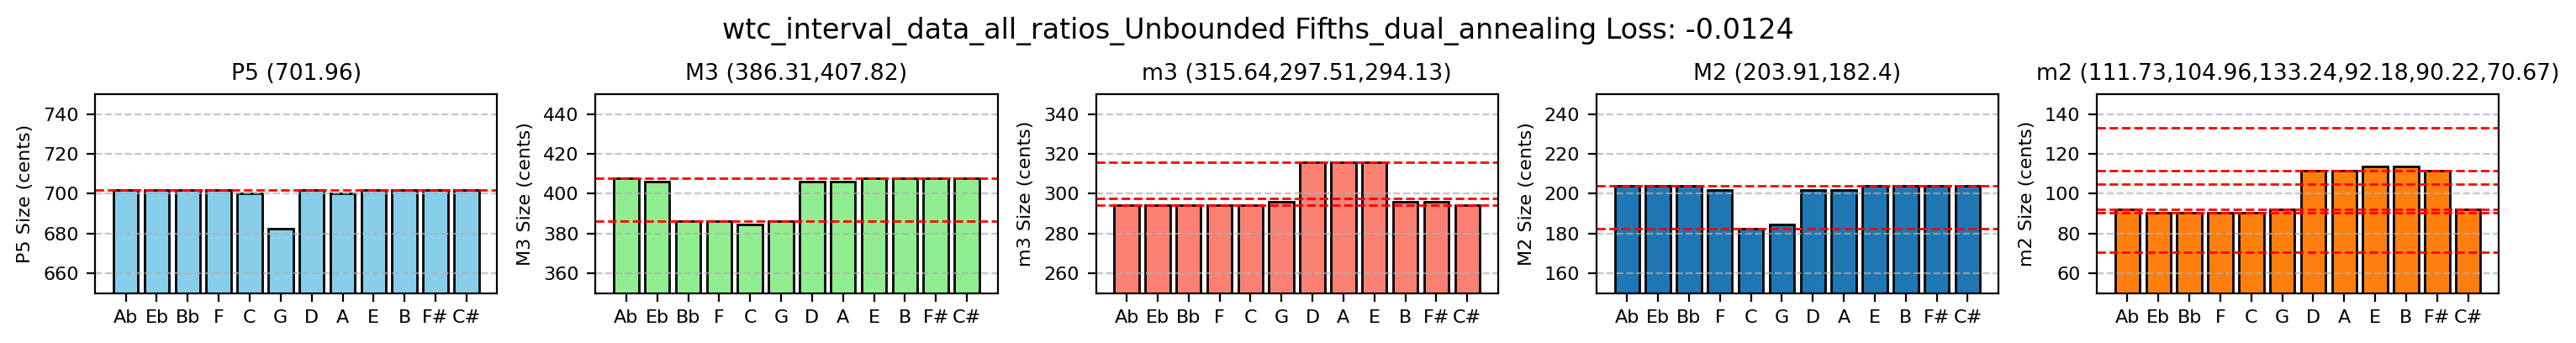

        P1      m2      M2      m3      M3      P4   A4-d5      P5      m6      M6      m7      M7 
C      0.00   90.22  182.40  294.13  384.36  498.04  588.27  700.00  792.18  884.36  996.09 1086.31
C#     0.00   92.18  203.91  294.14  407.82  498.05  609.78  701.96  794.14  905.87  996.09 1109.78
D      0.00  111.73  201.96  315.64  405.87  517.60  609.78  701.96  813.69  903.91 1017.60 1107.82
Eb     0.00   90.23  203.91  294.14  405.87  498.05  590.23  701.96  792.18  905.87  996.09 1088.27
E      0.00  113.68  203.91  315.64  407.82  500.00  611.73  701.95  815.64  905.86  998.04 1109.77
F      0.00   90.23  201.96  294.14  386.32  498.05  588.27  701.96  792.18  884.36  996.09 1086.32
F#     0.00  111.73  203.91  296.09  407.82  498.04  611.73  701.95  794.13  905.86  996.09 1109.77
G      0.00   92.18  184.36  296.09  386.31  500.00  590.22  682.40  794.13  884.36  998.04 1088.27
Ab     0.00   92.18  203.91  294.13  407.82  498.04  590.22  701.95  792.18  905.86  996.09 1107.82


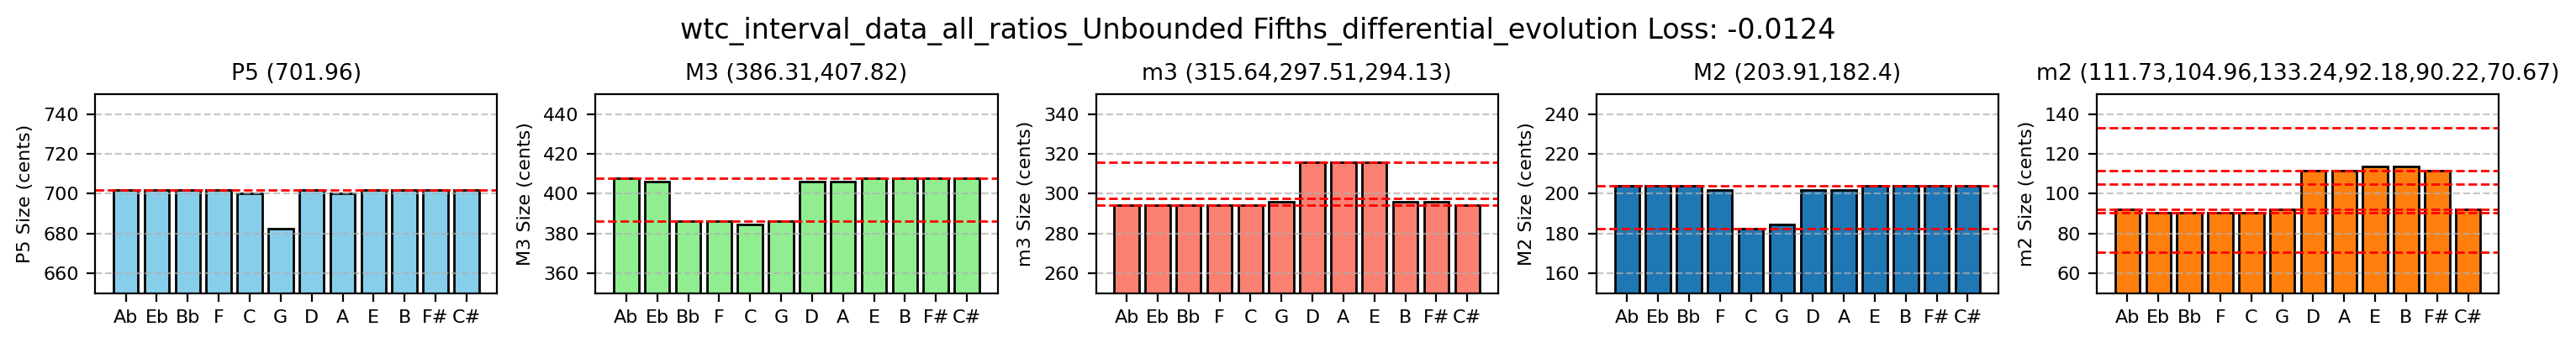

        P1      m2      M2      m3      M3      P4   A4-d5      P5      m6      M6      m7      M7 
C      0.00   90.22  182.40  294.13  384.36  498.04  588.27  700.00  792.18  884.36  996.09 1086.31
C#     0.00   92.18  203.91  294.14  407.82  498.05  609.78  701.96  794.14  905.87  996.09 1109.78
D      0.00  111.73  201.96  315.64  405.87  517.60  609.78  701.96  813.69  903.91 1017.60 1107.82
Eb     0.00   90.23  203.91  294.14  405.87  498.05  590.23  701.96  792.18  905.87  996.09 1088.27
E      0.00  113.68  203.91  315.64  407.82  500.00  611.73  701.95  815.64  905.86  998.04 1109.77
F      0.00   90.23  201.96  294.14  386.32  498.05  588.27  701.96  792.18  884.36  996.09 1086.32
F#     0.00  111.73  203.91  296.09  407.82  498.04  611.73  701.95  794.13  905.86  996.09 1109.77
G      0.00   92.18  184.36  296.09  386.31  500.00  590.22  682.40  794.13  884.36  998.04 1088.27
Ab     0.00   92.18  203.91  294.13  407.82  498.04  590.22  701.95  792.18  905.86  996.09 1107.82


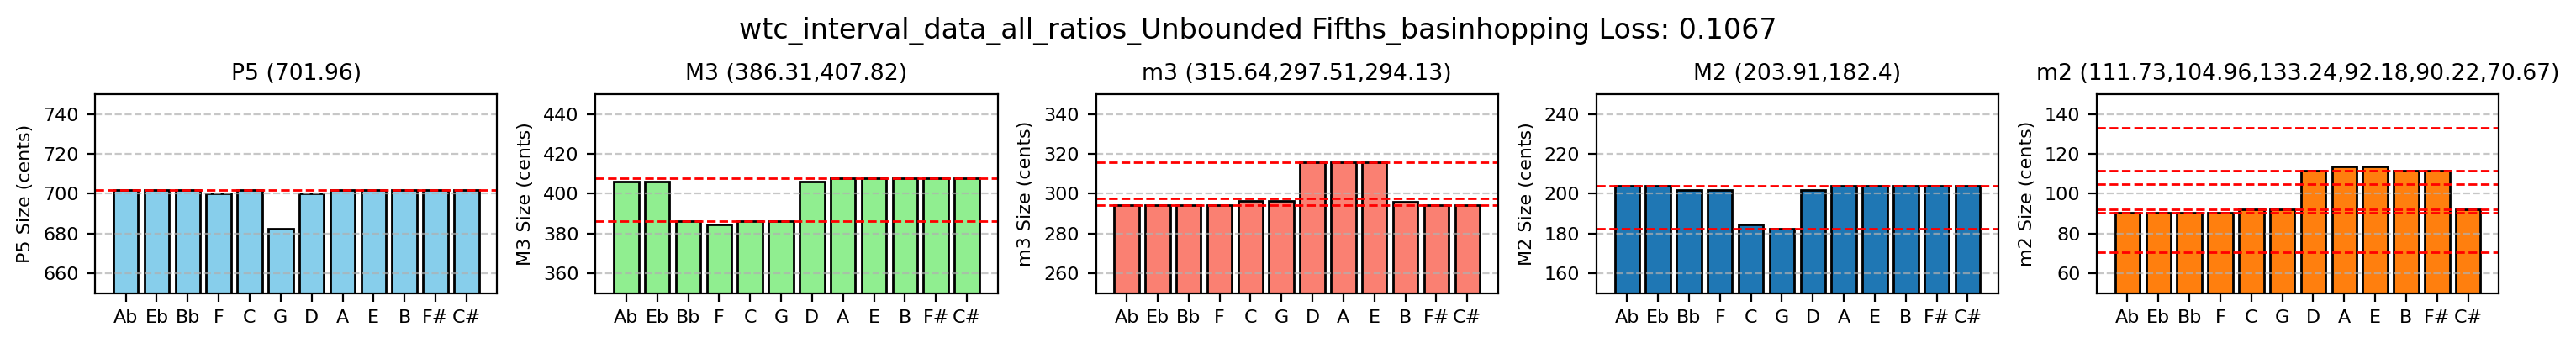

        P1      m2      M2      m3      M3      P4   A4-d5      P5      m6      M6      m7      M7 
C      0.00   92.20  184.38  296.11  386.33  500.02  590.24  701.97  794.16  884.39  998.07 1088.29
C#     0.00   92.18  203.91  294.13  407.82  498.04  609.77  701.96  792.19  905.87  996.09 1107.80
D      0.00  111.73  201.95  315.64  405.86  517.59  609.78  700.01  813.69  903.91 1015.62 1107.82
Eb     0.00   90.22  203.91  294.13  405.86  498.05  588.28  701.96  792.18  903.89  996.09 1088.27
E      0.00  113.69  203.91  315.64  407.83  498.06  611.74  701.96  813.67  905.87  998.05 1109.78
F      0.00   90.22  201.95  294.14  384.37  498.05  588.27  699.98  792.18  884.36  996.09 1086.31
F#     0.00  111.72  203.92  294.15  407.83  498.05  609.76  701.96  794.14  905.87  996.09 1109.78
G      0.00   92.19  182.42  296.10  386.32  498.03  590.23  682.41  794.14  884.36  998.05 1088.28
Ab     0.00   90.23  203.91  294.13  405.84  498.04  590.22  701.95  792.17  905.86  996.08 1107.81


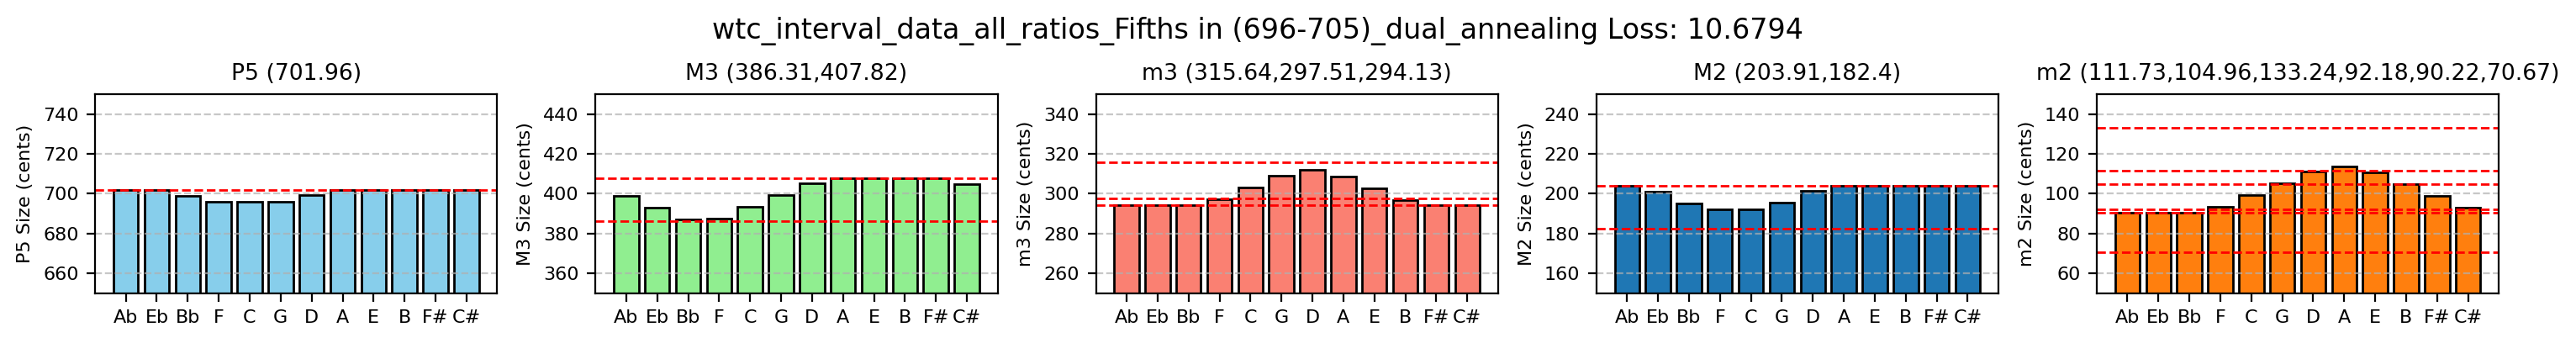

        P1      m2      M2      m3      M3      P4   A4-d5      P5      m6      M6      m7      M7 
C      0.00   99.18  192.00  303.09  393.42  504.00  597.22  696.00  801.13  891.47 1005.05 1095.38
C#     0.00   92.82  203.91  294.24  404.82  498.04  596.82  701.95  792.29  905.87  996.20 1100.82
D      0.00  111.09  201.42  312.00  405.22  504.00  609.13  699.47  813.05  903.38 1008.00 1107.18
Eb     0.00   90.33  200.91  294.13  392.91  498.04  588.38  701.96  792.29  896.91  996.09 1088.91
E      0.00  110.58  203.80  302.58  407.71  498.05  611.63  701.96  806.58  905.76  998.58 1109.67
F      0.00   93.22  192.00  297.13  387.47  501.05  591.38  696.00  795.18  888.00  999.09 1089.42
F#     0.00   98.78  203.91  294.25  407.83  498.16  602.78  701.96  794.78  905.87  996.20 1106.78
G      0.00  105.13  195.47  309.05  399.38  504.00  603.18  696.00  807.09  897.42 1008.00 1101.22
Ab     0.00   90.34  203.92  294.25  398.87  498.05  590.87  701.96  792.29  902.87  996.09 1094.87


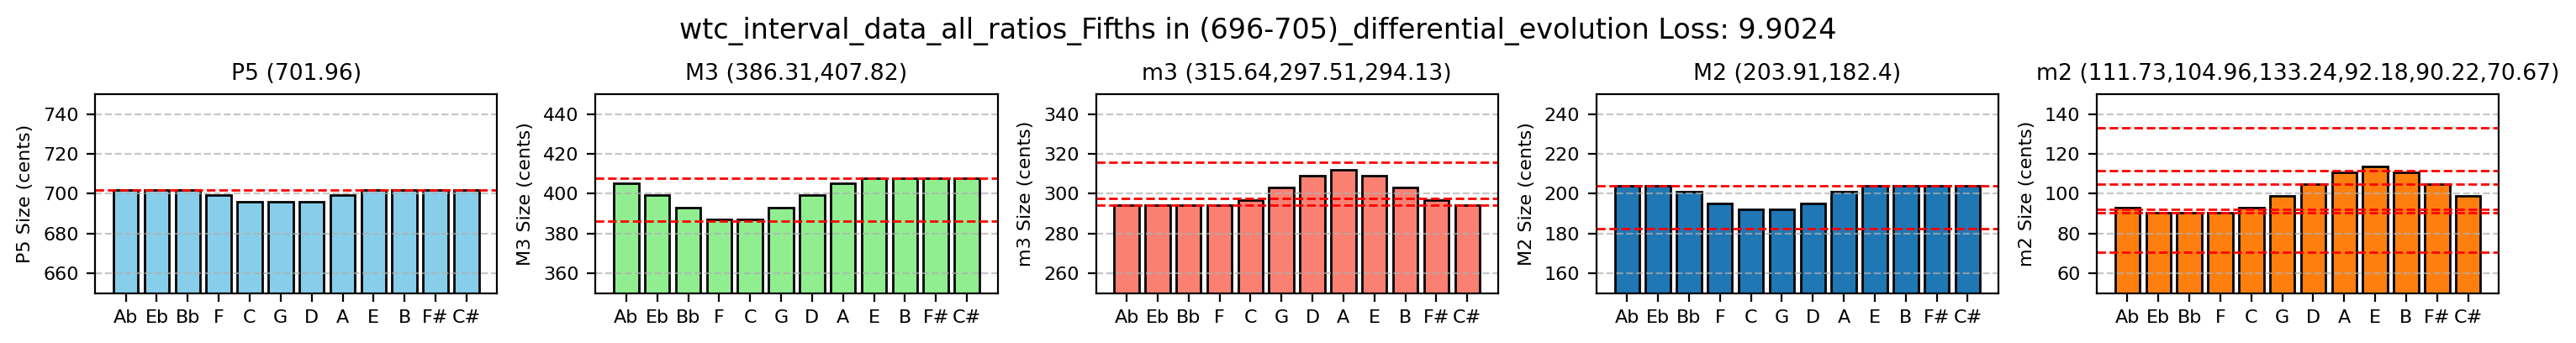

        P1      m2      M2      m3      M3      P4   A4-d5      P5      m6      M6      m7      M7 
C      0.00   93.02  192.00  296.93  387.15  500.85  591.07  696.00  794.98  888.00  998.89 1089.11
C#     0.00   98.98  203.91  294.13  407.83  498.05  602.98  701.96  794.98  905.87  996.09 1106.98
D      0.00  104.93  195.15  308.85  399.07  504.00  602.98  696.00  806.89  897.11 1008.00 1101.02
Eb     0.00   90.22  203.92  294.14  399.07  498.05  591.07  701.96  792.18  903.07  996.09 1095.07
E      0.00  113.70  203.92  308.85  407.83  500.85  611.74  701.96  812.85  905.87 1004.85 1109.78
F      0.00   90.22  195.15  294.13  387.15  498.04  588.26  699.15  792.17  891.15  996.08 1086.30
F#     0.00  104.93  203.91  296.93  407.82  498.04  608.93  701.95  800.93  905.86  996.08 1109.78
G      0.00   98.98  192.00  302.89  393.11  504.00  597.02  696.00  800.93  891.15 1004.85 1095.07
Ab     0.00   93.02  203.91  294.13  405.02  498.04  597.02  701.95  792.17  905.87  996.09 1101.02


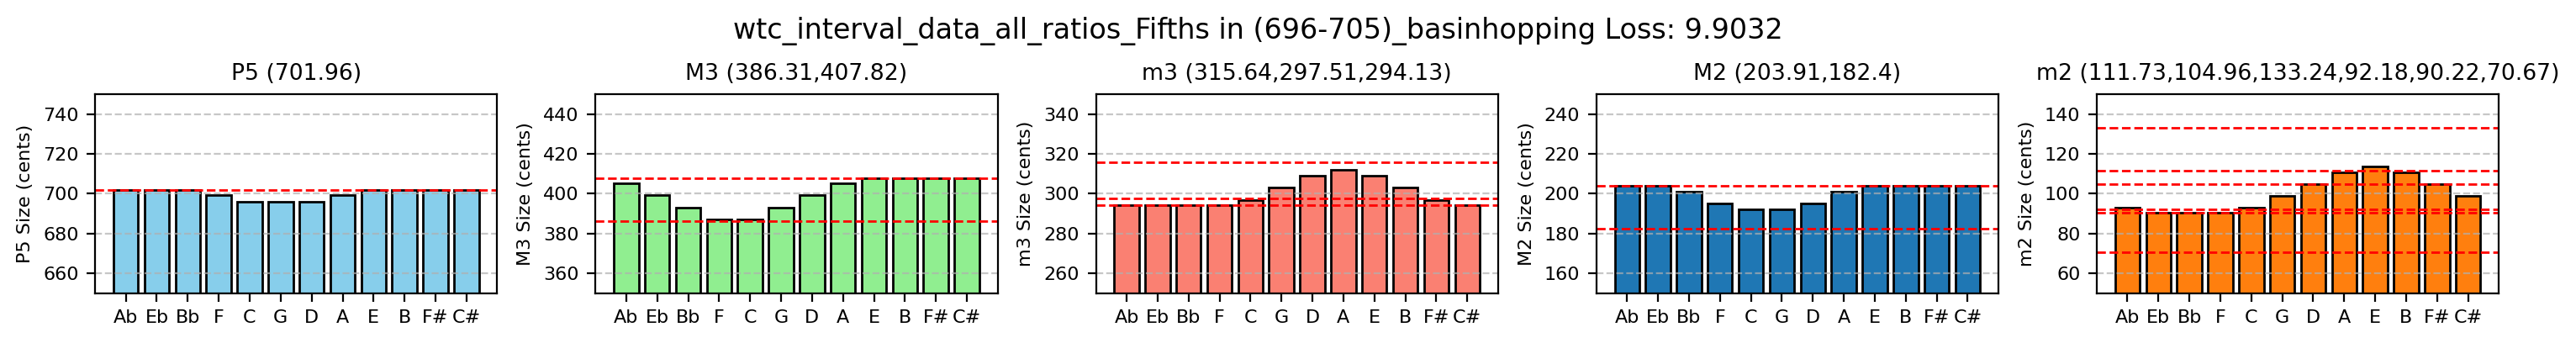

        P1      m2      M2      m3      M3      P4   A4-d5      P5      m6      M6      m7      M7 
C      0.00   93.02  192.00  296.93  387.15  500.85  591.07  696.00  794.98  888.00  998.89 1089.11
C#     0.00   98.98  203.91  294.13  407.83  498.05  602.98  701.96  794.98  905.87  996.09 1106.98
D      0.00  104.93  195.15  308.85  399.07  504.00  602.98  696.00  806.89  897.11 1008.00 1101.02
Eb     0.00   90.22  203.92  294.14  399.07  498.05  591.07  701.96  792.18  903.07  996.09 1095.07
E      0.00  113.70  203.92  308.85  407.83  500.85  611.74  701.96  812.85  905.87 1004.85 1109.78
F      0.00   90.22  195.15  294.13  387.15  498.04  588.26  699.15  792.17  891.15  996.08 1086.30
F#     0.00  104.93  203.91  296.93  407.82  498.04  608.93  701.95  800.93  905.86  996.08 1109.78
G      0.00   98.98  192.00  302.89  393.11  504.00  597.02  696.00  800.93  891.15 1004.85 1095.07
Ab     0.00   93.02  203.91  294.13  405.02  498.04  597.02  701.95  792.17  905.87  996.09 1101.02


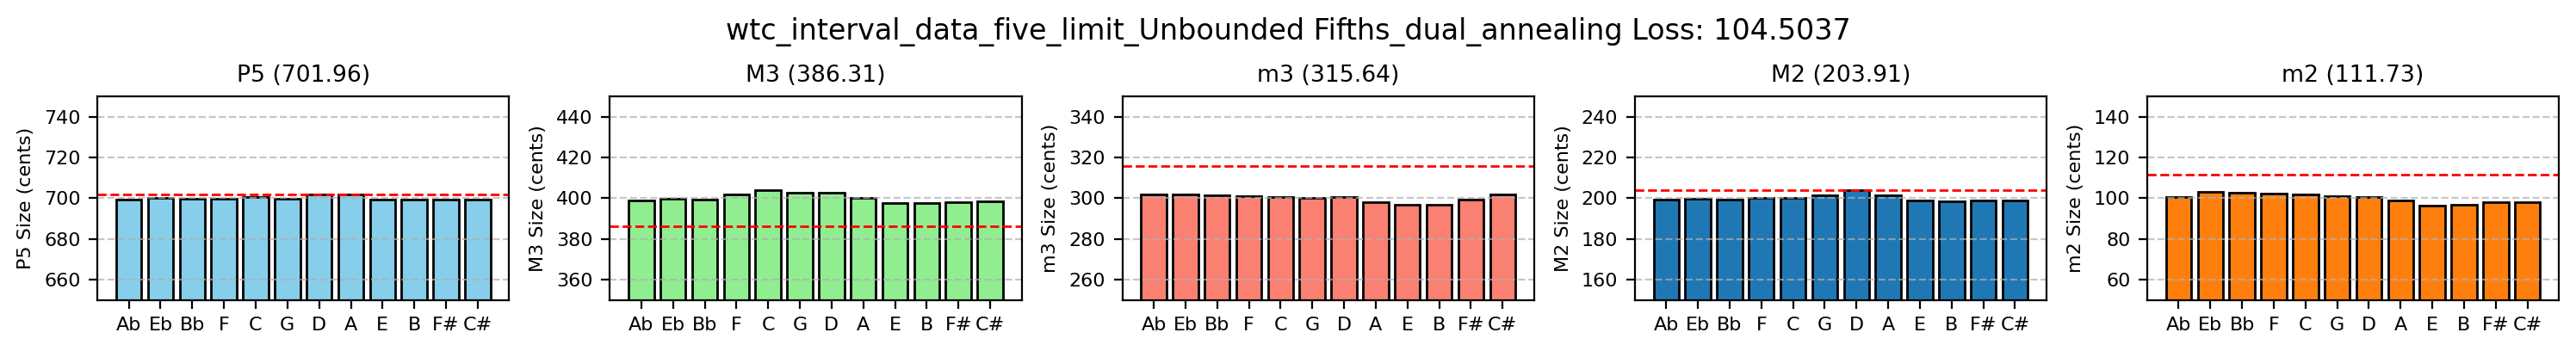

        P1      m2      M2      m3      M3      P4   A4-d5      P5      m6      M6      m7      M7 
C      0.00  101.85  199.94  300.64  403.85  500.28  602.59  700.38  801.30  901.90 1000.65 1103.23
C#     0.00   98.10  198.79  302.01  398.44  500.74  598.53  699.45  800.06  898.80 1001.38 1098.15
D      0.00  100.69  203.91  300.34  402.64  500.44  601.36  701.96  800.70  903.28 1000.06 1101.90
Eb     0.00  103.22  199.65  301.95  399.74  500.66  601.27  700.01  802.59  899.36 1001.21 1099.31
E      0.00   96.43  198.73  296.53  397.45  498.05  596.79  699.37  796.15  897.99  996.09 1096.78
F      0.00  102.30  200.10  301.01  401.62  500.36  602.94  699.72  801.56  899.66 1000.35 1103.57
F#     0.00   97.79  198.71  299.32  398.06  500.64  597.41  699.26  797.36  898.05 1001.27 1097.70
G      0.00  100.92  201.52  300.27  402.85  499.62  601.47  699.56  800.26  903.47  999.90 1102.21
Ab     0.00  100.60  199.35  301.93  398.70  500.55  598.64  699.34  802.55  898.99 1001.29 1099.08


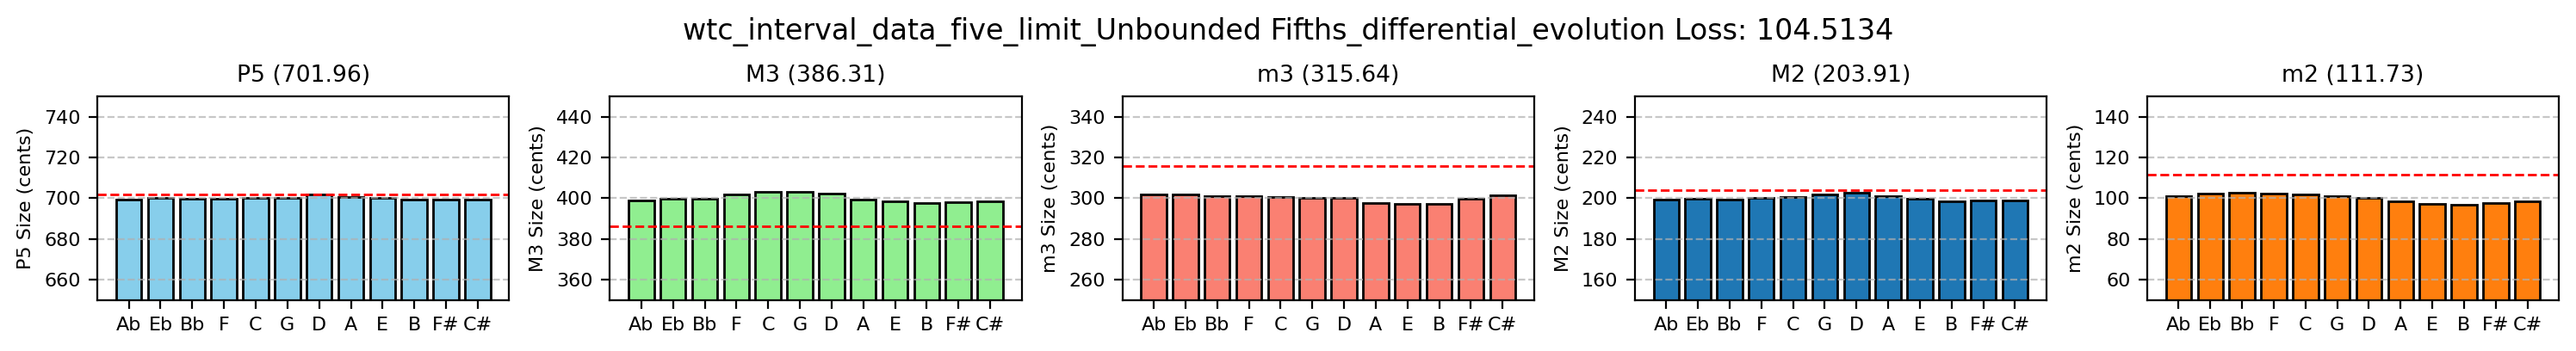

        P1      m2      M2      m3      M3      P4   A4-d5      P5      m6      M6      m7      M7 
C      0.00  101.79  200.38  300.62  403.04  500.33  602.59  700.32  801.26  902.34 1000.65 1103.23
C#     0.00   98.59  198.84  301.25  398.54  500.80  598.54  699.47  800.55  898.86 1001.44 1098.21
D      0.00  100.25  202.66  299.95  402.21  499.95  600.88  701.96  800.27  902.85  999.62 1101.41
Eb     0.00  102.41  199.70  301.97  399.70  500.63  601.71  700.02  802.60  899.38 1001.16 1099.75
E      0.00   97.29  199.55  297.29  398.22  499.30  597.61  700.19  796.96  898.75  997.34 1097.59
F      0.00  102.27  200.00  300.93  402.01  500.32  602.90  699.67  801.46  900.05 1000.30 1102.71
F#     0.00   97.73  198.66  299.75  398.06  500.63  597.41  699.20  797.79  898.03 1000.45 1097.73
G      0.00  100.93  202.01  300.32  402.90  499.68  601.46  700.05  800.30  902.71 1000.00 1102.27
Ab     0.00  101.08  199.39  301.97  398.74  500.53  599.12  699.37  801.78  899.07 1001.34 1099.07


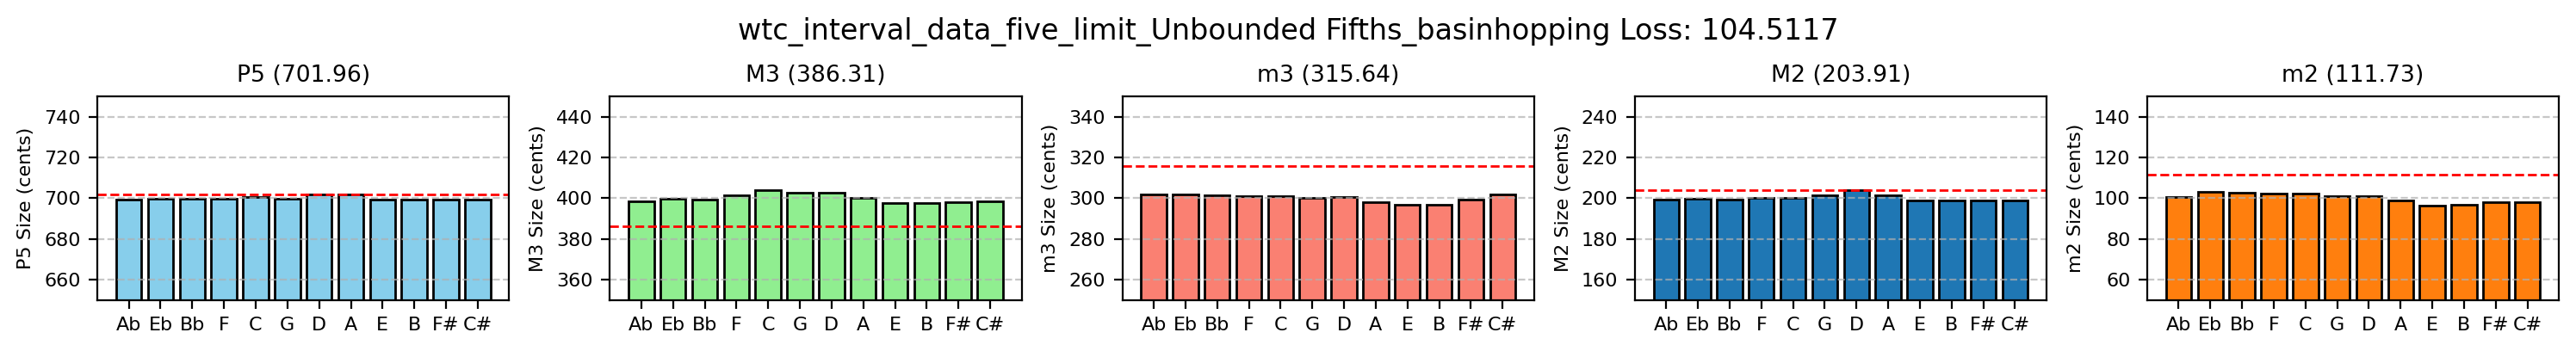

        P1      m2      M2      m3      M3      P4   A4-d5      P5      m6      M6      m7      M7 
C      0.00  102.07  200.05  300.90  403.96  500.44  602.71  700.56  801.53  902.01 1000.80 1103.37
C#     0.00   97.99  198.83  301.90  398.37  500.64  598.49  699.46  799.95  898.74 1001.31 1097.93
D      0.00  100.84  203.91  300.39  402.66  500.50  601.47  701.96  800.75  903.32  999.95 1102.01
Eb     0.00  103.07  199.54  301.81  399.66  500.63  601.12  699.91  802.47  899.10 1001.17 1099.16
E      0.00   96.48  198.75  296.59  397.56  498.05  596.84  699.41  796.04  898.10  996.09 1096.93
F      0.00  102.27  200.12  301.09  401.57  500.36  602.93  699.56  801.63  899.61 1000.46 1103.52
F#     0.00   97.85  198.82  299.30  398.09  500.66  597.29  699.36  797.34  898.19 1001.25 1097.73
G      0.00  100.97  201.45  300.25  402.81  499.44  601.51  699.50  800.34  903.41  999.88 1102.15
Ab     0.00  100.48  199.28  301.84  398.47  500.54  598.53  699.37  802.44  898.91 1001.18 1099.03


In [31]:
for key, res in results.items():
    print(key)
    tuning = res['best_result']['tuning']
    if 'all_ratios' in key:
        interval_types = INTERVAL_TYPES_ALL
    elif 'five_limit' in key:
        interval_types = INTERVAL_TYPES_FIVE_LIMIT
    else:
        interval_types = None
    plotBie(
        tuning,
        key + f" Loss: {round(res['best_result']['obj_val'],4)}",
        intervals=[7,4,3,2,1],
        saveplot=True,
        interval_types=interval_types,
        filename=key + '.pdf',
        orientation='horizontal'
    )
    printIntervalSizes(
        computeIntervalSizes(
            tuning
        )
    )


In [ ]:
SCALA_CENT_PATH = './scl_cents'
scala_cent_fnmames = sorted([os.path.join(SCALA_CENT_PATH, f) for f in os.listdir(SCALA_CENT_PATH) if f.endswith('.txt')])
historic_tunings = {}
for fn in scala_cent_fnmames:
    tuning_name = os.path.splitext(os.path.basename(fn))[0]
    with open(fn, 'r') as f:
        cents_list = f.readline().strip()
        historic_tunings[tuning_name] = [0.0] + json.loads(cents_list) + [1200.0]

In [28]:
results_hist = {}
for tuning_name in historic_tunings.keys():
    verb = False
    compute_obj_val_ismir2025(
        {
            'wtc_interval_data_all_ratios': wtc_interval_data_all_ratios,
            'wtc_interval_data_five_limit': wtc_interval_data_five_limit
        },
        {
            "Unbounded Fifths": None,
            "Fifths in (696-705)": (696, 705)
        },
        p_in=historic_tunings[tuning_name],
        p_name=tuning_name,
        results=results_hist,
        verbose = verb,
        verbose_procedure=verb,
        verbose_optimizer=verb,
        verbose_objective=False,
    )


In [29]:
historic_sorted = {}
for conf in [
    'all_ratios_Unbounded Fifths',
    'all_ratios_Fifths in (696-705)',
    'five_limit_Unbounded Fifths',
    'five_limit_Fifths in (696-705)',
]:
    historic_sorted[conf] = sorted([t for key, t in results_hist.items() if t['obj_val'] != np.inf and conf in key], key=lambda x: x['obj_val'])

In [30]:
for conf in [
    'all_ratios_Unbounded Fifths',
    'all_ratios_Fifths in (696-705)',
    'five_limit_Unbounded Fifths',
    'five_limit_Fifths in (696-705)',
]:
    print(f"--------- {conf} ---------")
    for t in historic_sorted[conf][:20]:
        print(f"{t['name']}\t{round(t['obj_val'],4)}")
    print()

--------- all_ratios_Unbounded Fifths ---------
ramis	0.4675
erlangen	0.8374
erlangen2	1.1281
schiassi	1.2785
marpurg-t1	1.4074
kirnberger1	1.4076
indian-vina3	1.5033
meanschis	1.9876
meanschis7	2.1772
velde_ji	3.2162
dudon_coherent_shrutis	3.3041
agricola	3.5428
meansabat	4.8853
raintree	4.9718
chin_lu2	4.9757
duoden12	5.3998
dudon_19-l_rocky_hwt	5.9887
wang-pho	6.0915
pipedum_12l	6.2873
zwolle	6.3832

--------- all_ratios_Fifths in (696-705) ---------
kelletat1	10.2749
kelletat	10.7822
sorge1	11.0487
dudon_comptine	11.1202
dudon_comptine_h3	11.6196
scottd1	11.8389
sparschuh-2009well885Hz	11.8804
neidhardt-s2	12.0623
secor12_2	12.1788
miller_bug	12.6871
smithgw_well1	12.7023
sparschuh-442widefrench5th-a	12.8115
prinz	12.8227
neidhardt-s3	13.0202
sparschuh-pc	13.0313
kirnberger	13.0497
kirnberger3v	13.0641
kirnberger3s	13.0695
kirnberger3	13.0798
secor_wtpb-24c	13.2659

--------- five_limit_Unbounded Fifths ---------
marpurg-a	105.0445
temp12b2w	105.6056
pykett_dorset	105.8744
handel2	

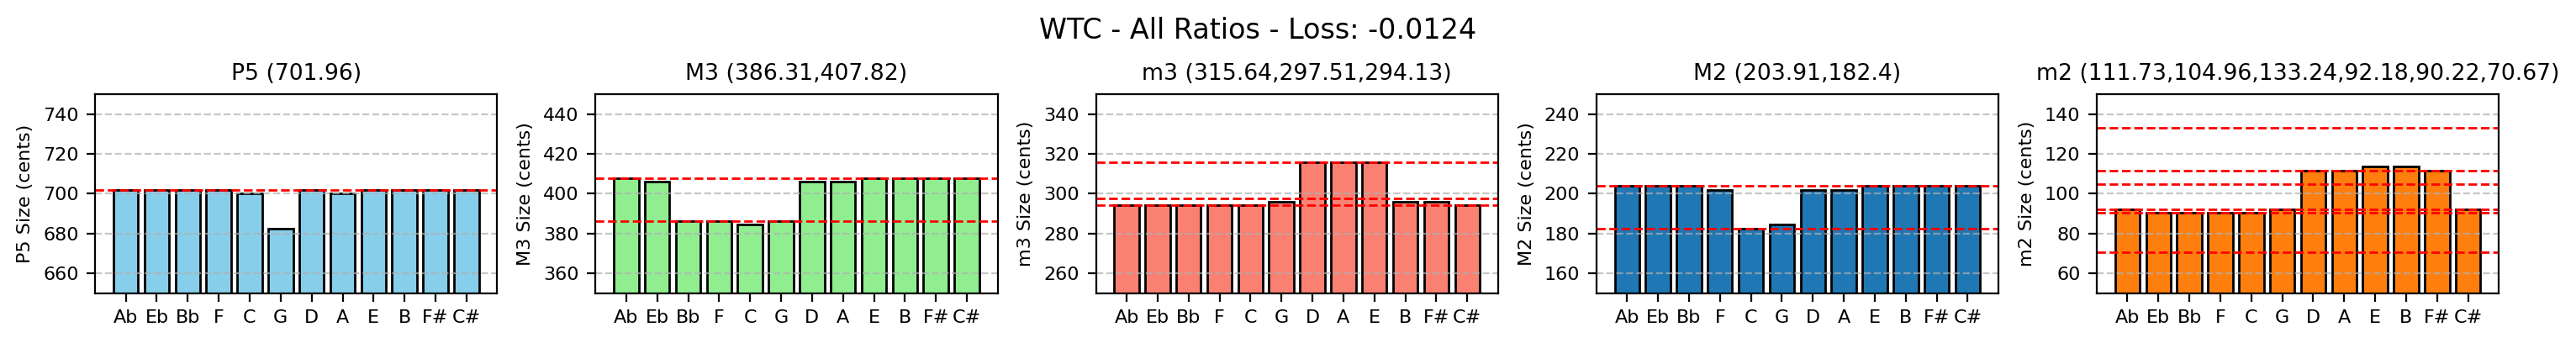

[   0.  ,   90.22,  182.4 ,  294.13,  384.36,  498.04,  588.27,  700.  ,
  792.18,  884.36,  996.09, 1086.31, 1200.  ]


In [45]:
key = 'wtc_interval_data_all_ratios_Unbounded Fifths_dual_annealing'
res = results[key]
tuning = res['best_result']['tuning']
if 'all_ratios' in key:
    interval_types = INTERVAL_TYPES_ALL
elif 'five_limit' in key:
    interval_types = INTERVAL_TYPES_FIVE_LIMIT
else:
    interval_types = None
plotBie(
    tuning,
    "WTC - All Ratios" + f" - Loss: {round(res['best_result']['obj_val'],4)}",
    intervals=[7,4,3,2,1],
    saveplot=True,
    interval_types=interval_types,
    filename='results/wtc_interval_data_all_ratios_Unbounded Fifths' + '.pdf',
    orientation='horizontal'
)
print(np.array2string(np.array(tuning).round(2), separator=', '))

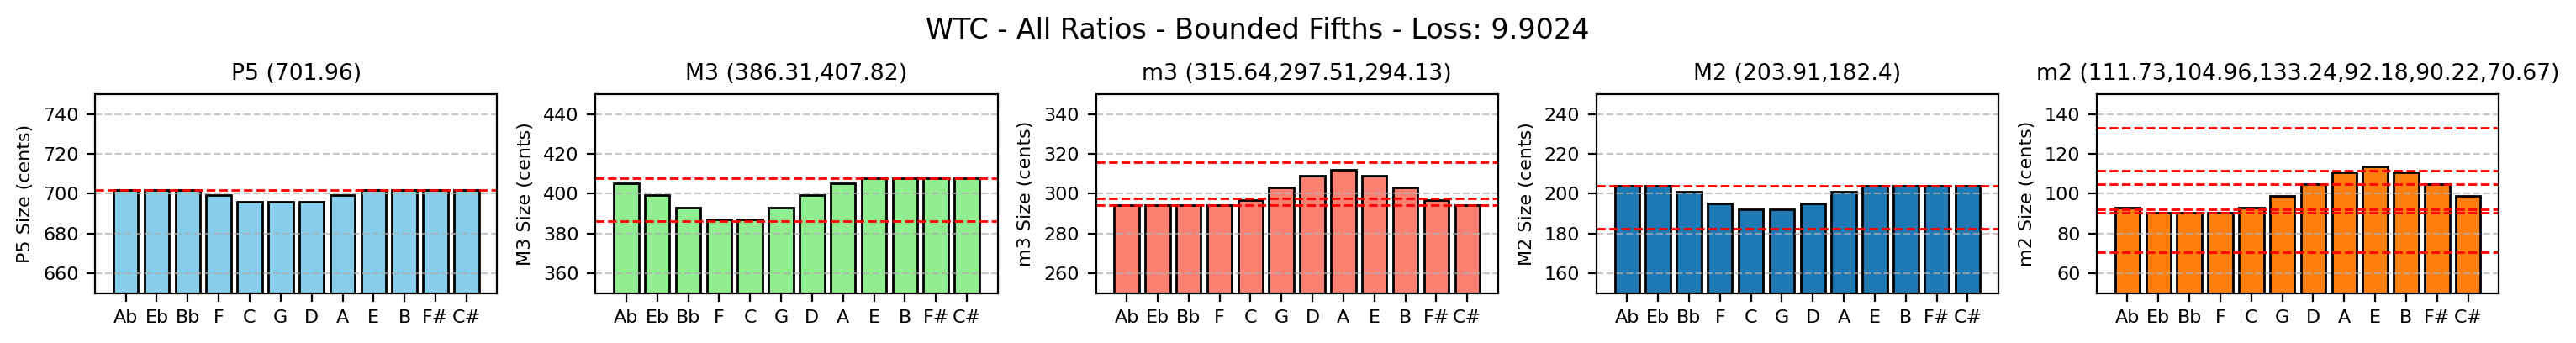

[   0.  ,  93.02, 192.  , 296.93, 387.15, 500.85, 591.07, 696.  , 794.98,
  888.  , 998.89,1089.11,1200.  ]


In [46]:
key = 'wtc_interval_data_all_ratios_Fifths in (696-705)_differential_evolution'
res = results[key]
tuning = res['best_result']['tuning']
if 'all_ratios' in key:
    interval_types = INTERVAL_TYPES_ALL
elif 'five_limit' in key:
    interval_types = INTERVAL_TYPES_FIVE_LIMIT
else:
    interval_types = None
plotBie(
    tuning,
    "WTC - All Ratios - Bounded Fifths" + f" - Loss: {round(res['best_result']['obj_val'],4)}",
    intervals=[7,4,3,2,1],
    saveplot=True,
    interval_types=interval_types,
    filename='results/wtc_interval_data_all_ratios_Fifths in (696-705)' + '.pdf',
    orientation='horizontal'
)
print(np.array2string(np.array(tuning).round(2), separator=','))

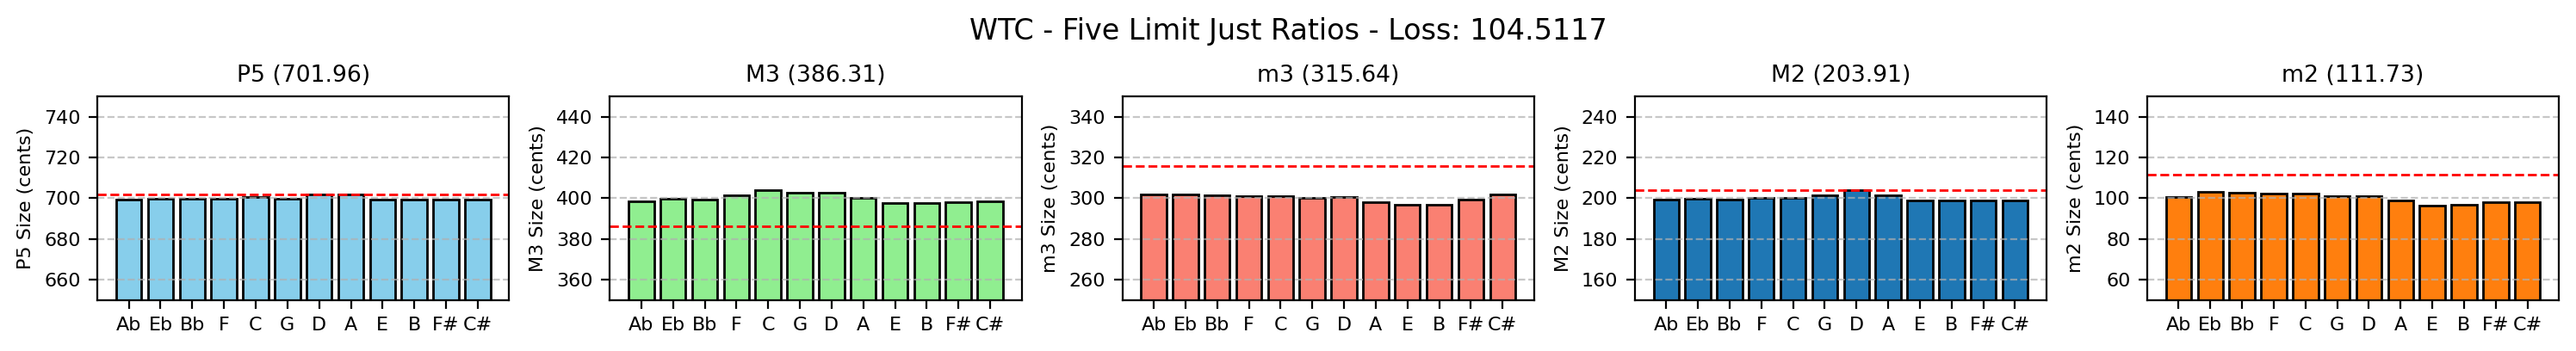

[   0.  , 102.07, 200.05, 300.9 , 403.96, 500.44, 602.71, 700.56, 801.53,
  902.01,1000.8 ,1103.37,1200.  ]


In [47]:
key = 'wtc_interval_data_five_limit_Unbounded Fifths_basinhopping'
res = results[key]
tuning = res['best_result']['tuning']
if 'all_ratios' in key:
    interval_types = INTERVAL_TYPES_ALL
elif 'five_limit' in key:
    interval_types = INTERVAL_TYPES_FIVE_LIMIT
else:
    interval_types = None
plotBie(
    tuning,
    "WTC - Five Limit Just Ratios" + f" - Loss: {round(res['best_result']['obj_val'],4)}",
    intervals=[7,4,3,2,1],
    saveplot=True,
    interval_types=interval_types,
    filename='results/wtc_interval_data_five_limit_Unbounded Fifths' + '.pdf',
    orientation='horizontal'
)
print(np.array2string(np.array(tuning).round(2), separator=','))